In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import math

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('owid-covid-latest.csv')

In [7]:
df.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,total_cases_per_million,new_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,12/4/2023,211630.0,118.0,128.143,7884.0,5145.546,2.869,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,41128772
1,OWID_AFR,NaN,Africa,12/4/2023,13074358.0,0.0,81.714,258841.0,9163.820,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614
2,ALB,Europe,Albania,12/4/2023,333897.0,0.0,0.000,3604.0,117473.485,0.000,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318
3,DZA,Africa,Algeria,12/4/2023,271613.0,0.0,2.714,6881.0,6048.852,0.000,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,44903228
4,ASM,Oceania,American Samoa,12/4/2023,8326.0,0.0,0.000,34.0,187967.039,0.000,...,NaN,283.750,NaN,NaN,NaN,NaN,NaN,73.74,NaN,44295


# CLEANING/PREPROCESSING

In [8]:
df.shape

(253, 53)

In [9]:
#dropping the useless columns from M to AC

df.drop(df.loc[:, 'icu_patients':'tests_units'].columns, axis=1, inplace=True)

In [10]:
df.shape

(253, 36)

In [11]:
df.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,total_cases_per_million,new_cases_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,12/4/2023,211630.0,118.0,128.143,7884.0,5145.546,2.869,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,41128772
1,OWID_AFR,NaN,Africa,12/4/2023,13074358.0,0.0,81.714,258841.0,9163.820,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614
2,ALB,Europe,Albania,12/4/2023,333897.0,0.0,0.000,3604.0,117473.485,0.000,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318
3,DZA,Africa,Algeria,12/4/2023,271613.0,0.0,2.714,6881.0,6048.852,0.000,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,44903228
4,ASM,Oceania,American Samoa,12/4/2023,8326.0,0.0,0.000,34.0,187967.039,0.000,...,NaN,283.750,NaN,NaN,NaN,NaN,NaN,73.74,NaN,44295


In [12]:
df.drop('iso_code', axis=1, inplace=True)

In [13]:
df.head()

,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Asia,Afghanistan,12/4/2023,211630.0,118.0,128.143,7884.0,5145.546,2.869,191.691,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,41128772
1,NaN,Africa,12/4/2023,13074358.0,0.0,81.714,258841.0,9163.820,0.000,181.422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426736614
2,Europe,Albania,12/4/2023,333897.0,0.0,0.000,3604.0,117473.485,0.000,1267.979,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318
3,Africa,Algeria,12/4/2023,271613.0,0.0,2.714,6881.0,6048.852,0.000,153.241,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,44903228
4,Oceania,American Samoa,12/4/2023,8326.0,0.0,0.000,34.0,187967.039,0.000,767.581,...,NaN,283.750,NaN,NaN,NaN,NaN,NaN,73.74,NaN,44295


In [14]:
df.dropna(subset=['continent'], inplace=True)

In [15]:
df.head()

,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Asia,Afghanistan,12/4/2023,211630.0,118.0,128.143,7884.0,5145.546,2.869,191.691,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,41128772
2,Europe,Albania,12/4/2023,333897.0,0.0,0.000,3604.0,117473.485,0.000,1267.979,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318
3,Africa,Algeria,12/4/2023,271613.0,0.0,2.714,6881.0,6048.852,0.000,153.241,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,44903228
4,Oceania,American Samoa,12/4/2023,8326.0,0.0,0.000,34.0,187967.039,0.000,767.581,...,NaN,283.750,NaN,NaN,NaN,NaN,NaN,73.74,NaN,44295
5,Europe,Andorra,12/4/2023,47939.0,0.0,1.286,159.0,600415.816,0.000,1991.408,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,79843


In [16]:
df.drop_duplicates(subset=['location'], keep='first', inplace=True)

In [17]:
# convert 'date' column to datetime object
df['last_updated_date'] = pd.to_datetime(df['last_updated_date'])


In [18]:
df['last_updated_date'] = df['last_updated_date'].dt.strftime('%d-%m-%Y')

In [19]:
df.head()

,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,Asia,Afghanistan,04-12-2023,211630.0,118.0,128.143,7884.0,5145.546,2.869,191.691,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,41128772
2,Europe,Albania,04-12-2023,333897.0,0.0,0.000,3604.0,117473.485,0.000,1267.979,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,2842318
3,Africa,Algeria,04-12-2023,271613.0,0.0,2.714,6881.0,6048.852,0.000,153.241,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,44903228
4,Oceania,American Samoa,04-12-2023,8326.0,0.0,0.000,34.0,187967.039,0.000,767.581,...,NaN,283.750,NaN,NaN,NaN,NaN,NaN,73.74,NaN,44295
5,Europe,Andorra,04-12-2023,47939.0,0.0,1.286,159.0,600415.816,0.000,1991.408,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,79843


In [20]:
df.fillna(0, inplace=True)

In [21]:
df.to_csv('owid_covid_latest_cleaned.csv', index = False)

PermissionError: [Errno 13] Permission denied: 'owid_covid_latest_cleaned.csv'

# DATA ANALYSIS

In [22]:
df2 = pd.read_csv('owid_covid_latest_cleaned.csv')

population analysis

In [23]:
#total cases
total_cases_mean = df2['total_cases'].mean()
total_cases_std = np.std(df2['total_cases'])
total_cases_var = np.var(df2['total_cases'])

print('Population standard deviation:', total_cases_std)
print('Population variance:', total_cases_var)
print('Population mean:', total_cases_mean)

Population standard deviation: 11136172.47017786
Population variance: 124014337285547.28
Population mean: 3165105.34439834


In [24]:
#hand washing
handwashing_facilities_mean = df2['handwashing_facilities'].mean()
handwashing_facilities_std = np.std(df2['handwashing_facilities'])
handwashing_facilities_var = np.var(df2['handwashing_facilities'])

print('Population standard deviation:', handwashing_facilities_std)
print('Population variance:', handwashing_facilities_var)
print('Population mean:', handwashing_facilities_mean)

Population standard deviation: 31.93831812298555
Population variance: 1020.0561645250272
Population mean: 19.981738589211623


In [25]:
#hospital beds per thousand
hospital_beds_per_thousand_mean = df2['hospital_beds_per_thousand'].mean()
hospital_beds_per_thousand_std = np.std(df2['hospital_beds_per_thousand'])
hospital_beds_per_thousand_var = np.var(df2['hospital_beds_per_thousand'])

print('Population standard deviation:', hospital_beds_per_thousand_std)
print('Population variance:', hospital_beds_per_thousand_var)
print('Population mean:', hospital_beds_per_thousand_mean)

Population standard deviation: 2.5737057313621063
Population variance: 6.623961191646155
Population mean: 2.2119419087136927


In [26]:
#total deaths
total_deaths_mean = df2['total_deaths'].mean()
total_deaths_std = np.std(df2['total_deaths'])
total_deaths_var = np.var(df2['total_deaths'])

print('Population standard deviation:', total_deaths_std)
print('Population variance:', total_deaths_var)
print('Population mean:', total_deaths_mean)

Population standard deviation: 101703.10989254176
Population variance: 10343522561.814426
Population mean: 28618.30705394191


In [27]:
#total vaccinations
total_vaccinations_mean = df2['total_vaccinations'].mean()
total_vaccinations_std = np.std(df2['total_vaccinations'])
total_vaccinations_var = np.var(df2['total_vaccinations'])

print('Population standard deviation:', total_vaccinations_std)
print('Population variance:', total_vaccinations_var)
print('Population mean:', total_vaccinations_mean)

Population standard deviation: 154724671.64060435
Population variance: 2.3939724014292836e+16
Population mean: 25218320.995850623


In [28]:
#population 
population_mean = df2['population'].mean()
population_std = np.std(df2['population'])
population_var = np.var(df2['population'])

print('Population standard deviation:', population_std)
print('Population variance:', population_var)
print('Population mean:', population_mean)

Population standard deviation: 134582846.06484783
Population variance: 1.811254245491453e+16
Population mean: 33378790.506224066


In [29]:
#life_expectancy
life_expec_mean = np.mean(df2['life_expectancy'])
life_expec_std = np.std(df2['life_expectancy'])
life_expec_var = np.var(df2['life_expectancy'])

print('Population standard deviation:', life_expec_std)
print('Population variance:', life_expec_var)
print('Population mean:', life_expec_mean)

Population standard deviation: 15.762905425678783
Population variance: 248.4691874588936
Population mean: 70.98663900414937


In [30]:
#cardiovascular 
cardiovasc_mean = np.mean(df2['cardiovasc_death_rate'])
cardiovasc_std = np.std(df2['cardiovasc_death_rate'])
cardiovasc_var = np.var(df2['cardiovasc_death_rate'])

print('Population standard deviation:', cardiovasc_std)
print('Population variance:', cardiovasc_var)
print('Population mean:', cardiovasc_mean)

Population standard deviation: 150.62788880031832
Population variance: 22688.760884441057
Population mean: 213.95594605809123


In [31]:
#diabetes 
diabetes_mean = np.mean(df2['diabetes_prevalence'])
diabetes_std = np.std(df2['diabetes_prevalence'])
diabetes_var = np.var(df2['diabetes_prevalence'])

print('Population standard deviation:', diabetes_std)
print('Population variance:', diabetes_var)
print('Population mean:', diabetes_mean)

Population standard deviation: 5.493777262726893
Population variance: 30.181588612454995
Population mean: 7.28244813278008


In [32]:
#female smokers 
f_smokers_mean = np.mean(df2['female_smokers'])
f_smokers_std = np.std(df2['female_smokers'])
f_smokers_var = np.var(df2['female_smokers'])

print('Population standard deviation:', f_smokers_std)
print('Population variance:', f_smokers_var)
print('Population mean:', f_smokers_mean)

Population standard deviation: 9.937417660599547
Population variance: 98.75226976119578
Population mean: 6.55477178423236


In [33]:
#male smokers 
m_smokers_mean = np.mean(df['male_smokers'])
m_smokers_std = np.std(df['male_smokers'])
m_smokers_var = np.var(df['male_smokers'])

print('Population standard deviation:', m_smokers_std)
print('Population variance:', m_smokers_var)
print('Population mean:', m_smokers_mean)

Population standard deviation: 19.264855366597786
Population variance: 371.13465229593146
Population mean: 19.65684647302903


sample analysis

In [34]:
# select a sample from the population (e.g. by using df.sample())
sample = df2.sample(n=100)

In [35]:
#total_cases
total_cases_sample_mean = sample['total_cases'].mean()
total_cases_sample_std = np.std(sample['total_cases'])
total_cases_sample_var = np.var(sample['total_cases'])

print('Point estimate:', total_cases_sample_mean)
print('Sample variance:', total_cases_sample_var)
print('Sample standard deviation:', total_cases_sample_std)

Point estimate: 2617403.54
Sample variance: 56077995425754.96
Sample standard deviation: 7488524.248859381


In [36]:
#handwashing facilities
handwashing_facilities_sample_mean = sample['handwashing_facilities'].mean()
handwashing_facilities_sample_std = np.std(sample['handwashing_facilities'])
handwashing_facilities_sample_var = np.var(sample['handwashing_facilities'])

print('Point estimate:', handwashing_facilities_sample_mean)
print('Sample variance:', handwashing_facilities_sample_var)
print('Sample standard deviation:', handwashing_facilities_sample_std)

Point estimate: 19.96443
Sample variance: 975.6775715650992
Sample standard deviation: 31.235837936016686


In [37]:
#hospital beds per thousand
hospital_beds_per_thousand_sample_mean = sample['hospital_beds_per_thousand'].mean()
hospital_beds_per_thousand_sample_std = np.std(sample['hospital_beds_per_thousand'])
hospital_beds_per_thousand_sample_var = np.var(sample['hospital_beds_per_thousand'])

print('Point estimate:', hospital_beds_per_thousand_sample_mean)
print('Sample variance:', hospital_beds_per_thousand_sample_var)
print('Sample standard deviation: ', hospital_beds_per_thousand_sample_std)

Point estimate: 2.3328200000000003
Sample variance: 6.584910207600002
Sample standard deviation:  2.566107988296674


In [38]:
#total deaths
total_deaths_sample_mean = sample['total_deaths'].mean()
total_deaths_sample_std = np.std(sample['total_deaths'])
total_deaths_sample_var = np.var(sample['total_deaths'])

print('Point estimate:', total_deaths_sample_mean)
print('Sample variance:', total_deaths_sample_var)
print('Sample standard deviation:', total_deaths_sample_std)

Point estimate: 27563.87
Sample variance: 6479483525.7131
Sample standard deviation: 80495.23914936274


In [39]:
#total vaccinations
total_vaccinations_sample_mean = sample['total_vaccinations'].mean()
total_vaccinations_sample_std = np.std(sample['total_vaccinations'])
total_vaccinations_sample_var = np.var(sample['total_vaccinations'])

print('Point estimate:', total_vaccinations_sample_mean)
print('Sample variance:', total_vaccinations_sample_var)
print('Sample standard deviation:', total_vaccinations_sample_std)

Point estimate: 38636982.31
Sample variance: 5.09271089742544e+16
Sample standard deviation: 225670354.6641747


In [40]:
#population
population_sample_mean = sample['population'].mean()
population_sample_std = np.std(sample['population'])
population_sample_var = np.var(sample['population'])

print('Point estimate:', population_sample_mean)
print('Sample variance:', population_sample_var)
print('Sample standard deviation:', population_sample_std)

Point estimate: 32158668.47
Sample variance: 2.043106453647317e+16
Sample standard deviation: 142937274.8322605


In [41]:
#life_expectancy
life_expec_sample_mean = sample['life_expectancy'].mean()
life_expec_sample_std = np.std(sample['life_expectancy'])
life_expec_sample_var = np.var(sample['life_expectancy'])

print('Point estimate:', life_expec_sample_mean)
print('Sample variance:', life_expec_sample_var)
print('Sample standard deviation:', life_expec_sample_std)

Point estimate: 72.32399999999996
Sample variance: 162.2300299999999
Sample standard deviation: 12.736955287665884


In [42]:
#cardiovascular
cardiovasc_sample_mean = sample['cardiovasc_death_rate'].mean()
cardiovasc_sample_std = np.std(sample['cardiovasc_death_rate'])
cardiovasc_sample_var = np.var(sample['cardiovasc_death_rate'])

print('Point estimate:', cardiovasc_sample_mean)
print('Sample variance:', cardiovasc_sample_var)
print('Sample standard deviation:', cardiovasc_sample_std)

Point estimate: 223.22757000000001
Sample variance: 21524.559136345102
Sample standard deviation: 146.71250504420235


In [43]:
#diabetes
diabetes_sample_mean = sample['diabetes_prevalence'].mean()
diabetes_sample_std = np.std(sample['diabetes_prevalence'])
diabetes_sample_var = np.var(sample['diabetes_prevalence'])

print('Point estimate:', diabetes_sample_mean)
print('Sample variance:', diabetes_sample_var)
print('Sample standard deviation:', diabetes_sample_std)

Point estimate: 7.243199999999998
Sample variance: 35.12439776000002
Sample standard deviation: 5.926583987424799


In [44]:
#female smokers
f_smokers_sample_mean = sample['female_smokers'].mean()
f_smokers_sample_std = np.std(sample['female_smokers'])
f_smokers_sample_var = np.var(sample['female_smokers'])

print('Point estimate:', f_smokers_sample_mean)
print('Sample variance:', f_smokers_sample_var)
print('Sample standard deviation:', f_smokers_sample_std)

Point estimate: 7.209999999999996
Sample variance: 109.54289999999992
Sample standard deviation: 10.466274408785578


In [45]:
#male smokers
m_smokers_sample_mean = sample['male_smokers'].mean()
m_smokers_sample_std = np.std(sample['male_smokers'])
m_smokers_sample_var = np.var(sample['male_smokers'])

print('Point estimate:', m_smokers_sample_mean)
print('Sample variance:', m_smokers_sample_var)
print('Sample standard deviation:', m_smokers_sample_std)

Point estimate: 20.063000000000002
Sample variance: 388.15473100000054
Sample standard deviation: 19.70164285028029


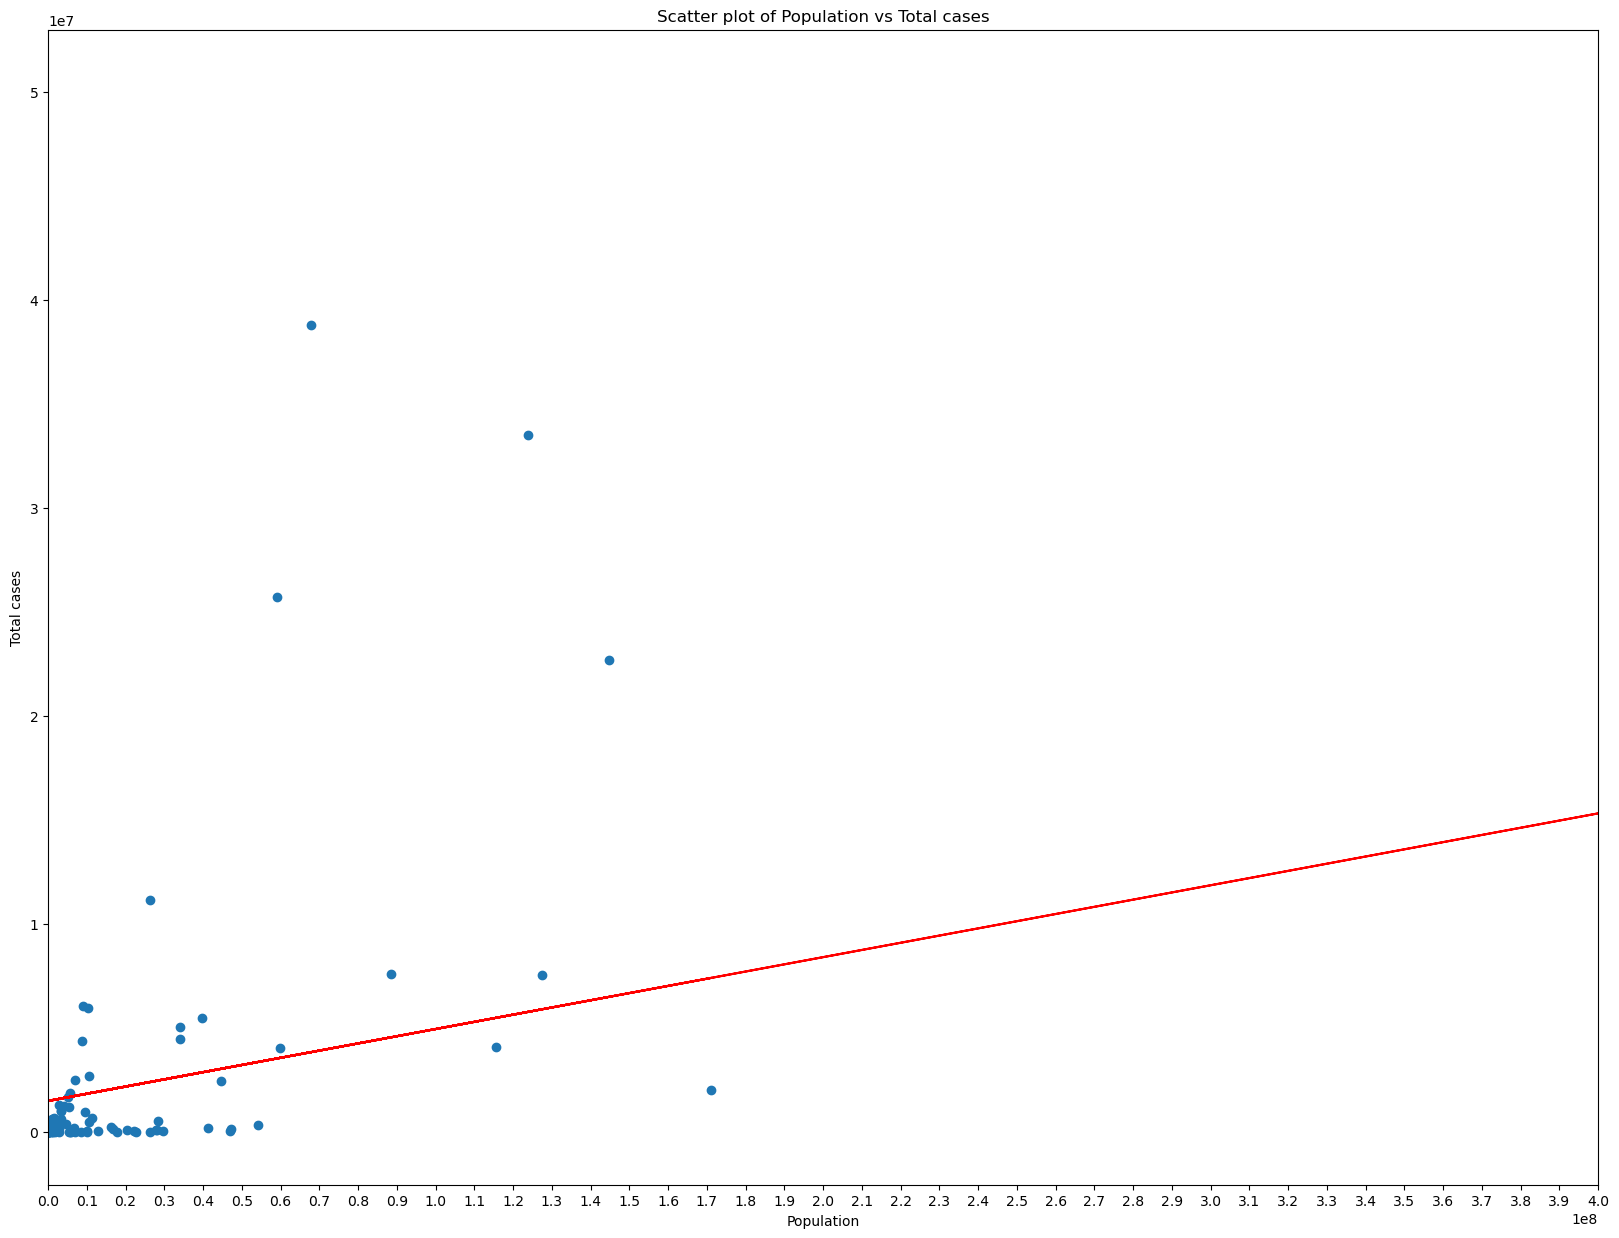

In [46]:
from matplotlib.ticker import ScalarFormatter


# create a scatter plot of two variables
fig, ax = plt.subplots(figsize = (20,15))

x = sample['population']
y = sample['total_cases']
ax.scatter(x, y)

# perform linear regression
m, b = np.polyfit(x, y, 1)
ax.set_xlim(0, 4 * 10 ** 8)
ax.set_xticks(np.arange(0, 4.1, 0.1) * 10 ** 8)
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=False))

# add the regression line to the plot
ax.plot(x, m*x + b, color='red')

# add labels and title to the plot
ax.set_xlabel('Population')
ax.set_ylabel('Total cases')
ax.set_title('Scatter plot of Population vs Total cases')

# show the plot
plt.show()

In [47]:
sample1 = df2.sample(n=100)
sample1

,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
3,Oceania,American Samoa,04-12-2023,8326.0,0.0,0.000,34.0,187967.039,0.000,767.581,...,0.0,283.750,0.00,0.0,0.0,0.000,0.000,73.74,0.000,44295
168,Asia,Philippines,04-12-2023,4083678.0,177.0,211.000,66420.0,35338.465,1.532,574.771,...,0.0,370.437,7.07,7.8,40.8,78.463,1.000,71.23,0.718,115559008
238,Asia,Yemen,04-12-2023,11945.0,0.0,0.000,2159.0,354.487,0.000,64.072,...,18.8,495.003,5.35,7.6,29.2,49.542,0.700,66.12,0.470,33696612
93,Asia,Hong Kong,04-09-2023,0.0,0.0,0.000,0.0,0.000,0.000,0.000,...,0.0,0.000,8.33,0.0,0.0,0.000,0.000,84.86,0.949,7488863
20,North America,Belize,04-12-2023,70782.0,0.0,0.000,688.0,174647.470,0.000,1697.571,...,0.0,176.957,17.11,0.0,0.0,90.083,1.300,74.62,0.716,405285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Europe,Romania,04-12-2023,3380891.0,6066.0,866.571,67961.0,171974.392,308.557,3456.944,...,5.7,370.946,9.74,22.9,37.1,0.000,6.892,76.05,0.828,19659270
186,Europe,San Marino,04-12-2023,23873.0,0.0,1.286,123.0,708607.896,0.000,3650.935,...,0.0,0.000,5.64,0.0,0.0,0.000,3.800,84.97,0.000,33690
42,Asia,China,04-12-2023,99239252.0,112.0,95.143,120905.0,69598.241,0.079,84.793,...,0.7,261.899,9.74,1.9,48.4,0.000,4.340,76.91,0.761,1425887360
43,South America,Colombia,04-12-2023,6363058.0,746.0,106.571,142690.0,122663.657,14.381,2750.702,...,4.5,124.240,7.44,4.7,13.5,65.386,1.710,77.29,0.767,51874028


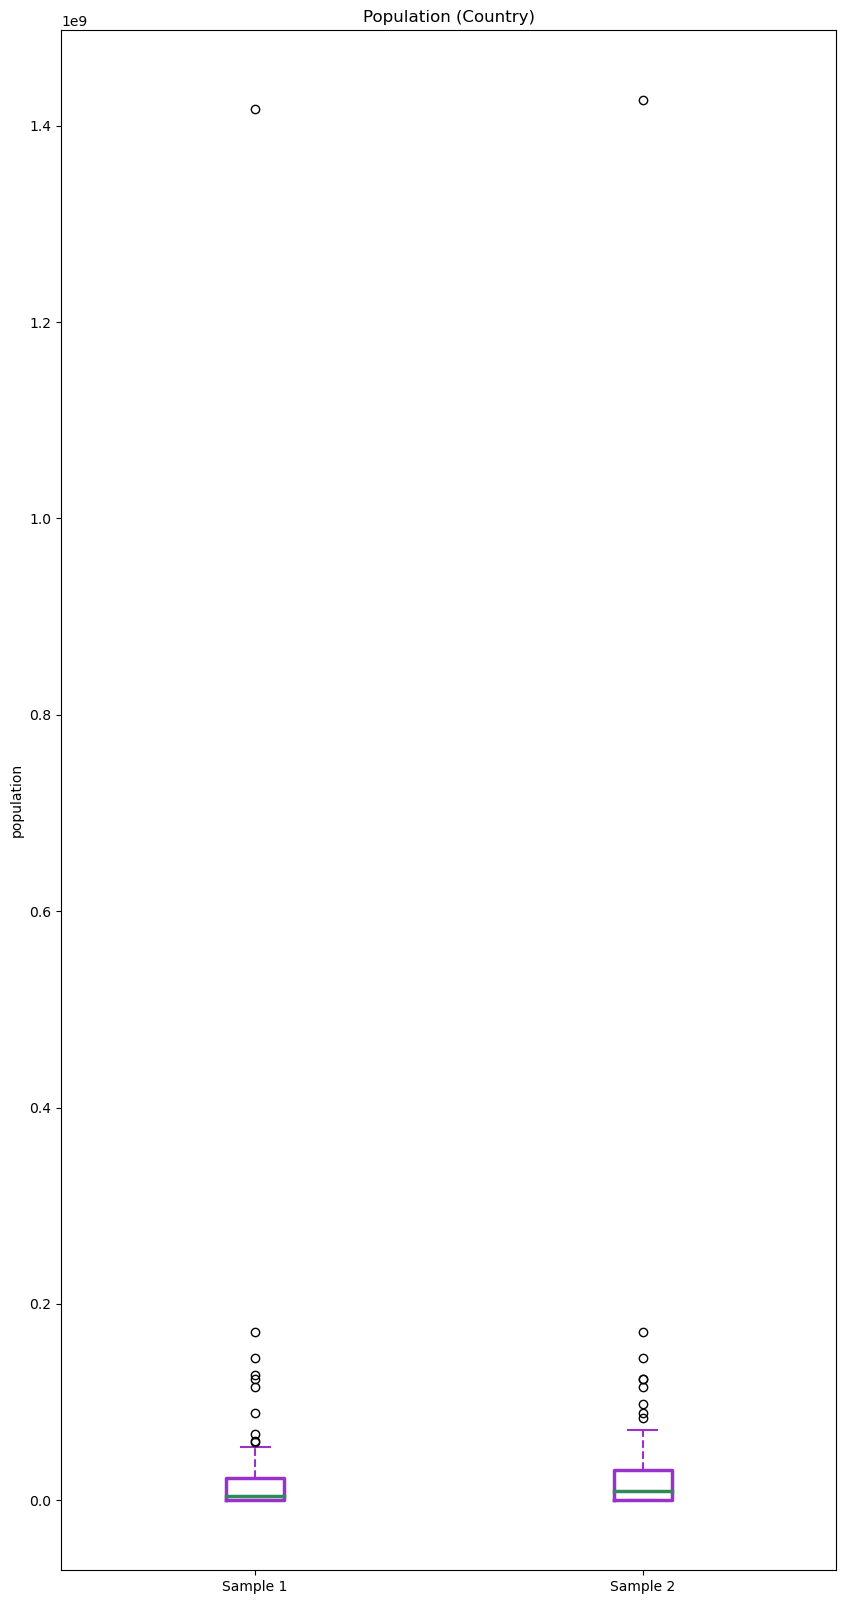

In [48]:
data = sample['population']
data2 = sample1['population']

# set up the box plot properties
boxprops = dict(linestyle='-', linewidth=2.5, color='darkorchid')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='darkorchid')
capprops = dict(linestyle='-', linewidth=1.5, color='darkorchid')
medianprops = dict(linestyle='-', linewidth=2.5, color='seagreen')

fig, ax = plt.subplots(figsize=(10,20))
ax.boxplot([data, data2], boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)

ax.set_title('Population (Country)')
ax.set_ylabel('population')

ax.set_xticklabels(['Sample 1', 'Sample 2'])

plt.show()

In [49]:
from scipy import stats

Removing Outliers

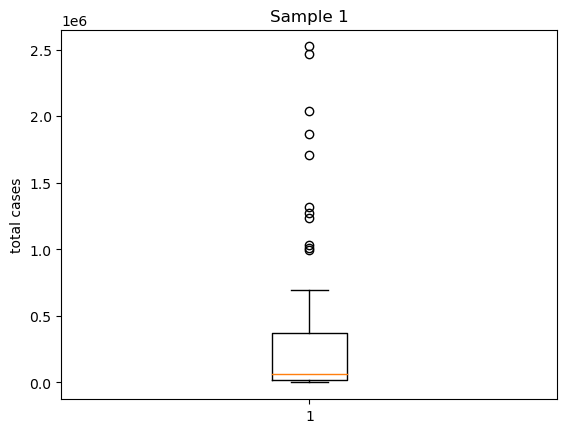

In [50]:
data = sample['total_cases']

# calculate the first and third quartiles (Q1 and Q3)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# calculate the interquartile range (IQR)
iqr = q3 - q1

# calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove outliers from the data
data_totcases = data[(data >= lower_bound) & (data <= upper_bound)]

fig, ax = plt.subplots()
ax.boxplot(data_totcases)

ax.set_title('Sample 1')
ax.set_ylabel('total cases')

plt.show()

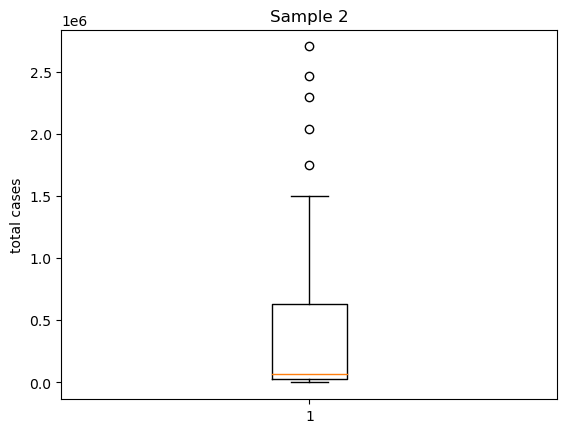

In [51]:
data1 = sample1['total_cases']

# calculate the first and third quartiles (Q1 and Q3)
q1 = np.percentile(data1, 25)
q3 = np.percentile(data1, 75)

# calculate the interquartile range (IQR)
iqr = q3 - q1

# calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove outliers from the data
data_totcases1 = data1[(data1 >= lower_bound) & (data1 <= upper_bound)]

fig, ax = plt.subplots()
ax.boxplot(data_totcases1)

ax.set_title('Sample 2')
ax.set_ylabel('total cases')

plt.show()

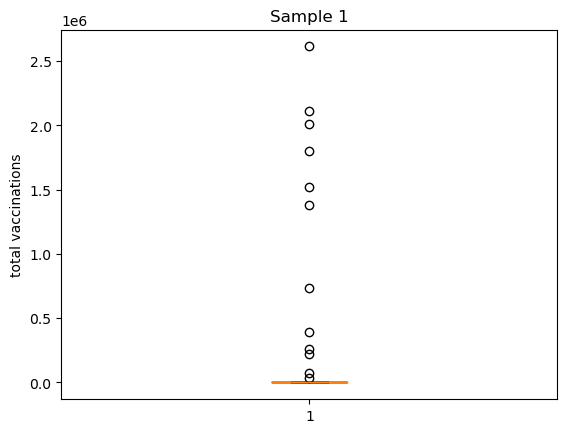

In [52]:
data2 = sample['total_vaccinations']

# calculate the first and third quartiles (Q1 and Q3)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# calculate the interquartile range (IQR)
iqr = q3 - q1

# calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove outliers from the data
data_totvaccine = data2[(data2 >= lower_bound) & (data2 <= upper_bound)]

fig, ax = plt.subplots()
ax.boxplot(data_totvaccine)

ax.set_title('Sample 1')
ax.set_ylabel('total vaccinations')

plt.show()

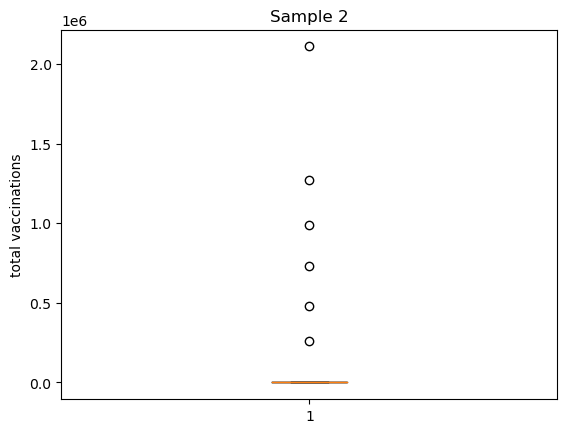

In [53]:
data3 = sample1['total_vaccinations']

# calculate the first and third quartiles (Q1 and Q3)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# calculate the interquartile range (IQR)
iqr = q3 - q1

# calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove outliers from the data
data_totvaccine1 = data3[(data3 >= lower_bound) & (data3 <= upper_bound)]

fig, ax = plt.subplots()
ax.boxplot(data_totvaccine1)

ax.set_title('Sample 2')
ax.set_ylabel('total vaccinations')

plt.show()

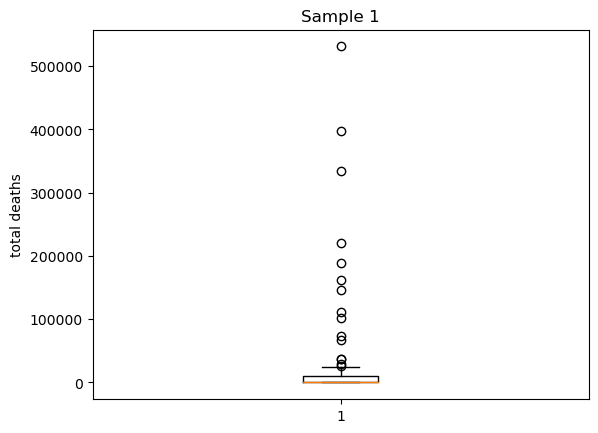

In [54]:
data4 = sample['total_deaths']

# calculate the first and third quartiles (Q1 and Q3)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# calculate the interquartile range (IQR)
iqr = q3 - q1

# calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove outliers from the data
data_totdeaths = data4[(data4 >= lower_bound) & (data4 <= upper_bound)]

fig, ax = plt.subplots()
ax.boxplot(data_totdeaths)

ax.set_title('Sample 1')
ax.set_ylabel('total deaths')

plt.show()

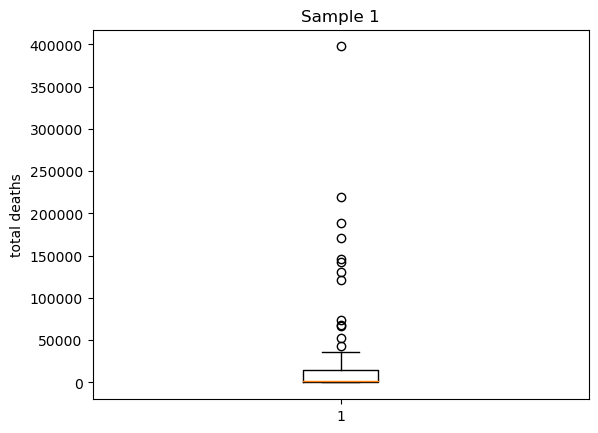

In [55]:
data5 = sample1['total_deaths']

# calculate the first and third quartiles (Q1 and Q3)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# calculate the interquartile range (IQR)
iqr = q3 - q1

# calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# remove outliers from the data
data_totdeaths1 = data5[(data5 >= lower_bound) & (data5 <= upper_bound)]

fig, ax = plt.subplots()
ax.boxplot(data_totdeaths1)

ax.set_title('Sample 1')
ax.set_ylabel('total deaths')

plt.show()

Confidence Interval

In [56]:
print("95% Confidence Interval of Total Covid Cases (sample size = 100): ",end="")
print("(",np.mean(data_totcases)-1.96*np.std(data_totcases)/math.sqrt(100),
      ",",np.mean(data_totcases)+1.96*np.std(data_totcases)/math.sqrt(100),")")

print("95% Confidence Interval of Total Covid Cases (sample 2 size = 100): ",end="")
print("(",np.mean(data_totcases1)-1.96*np.std(data_totcases1)/math.sqrt(100),
      ",",np.mean(data_totcases1)+1.96*np.std(data_totcases1)/math.sqrt(100),")")

95% Confidence Interval of Total Covid Cases (sample size = 100): ( 223028.33774252655 , 442046.31285988307 )
95% Confidence Interval of Total Covid Cases (sample 2 size = 100): ( 291842.8862044262 , 531281.7020308679 )


Z distribution

In [57]:
from scipy.stats import norm

pop1 = data_totcases
pop2 = data_totcases1

mean1 = pop1.mean()
mean2 = pop2.mean()
std1 = pop1.std(ddof=1)  # use ddof=1 to calculate the sample standard deviation
std2 = pop2.std(ddof=1)

# calculate the standard error of the difference in means
se_diff = ((std1*2)/len(pop1) + (std2**2)/len(pop2))*0.5

# calculate the z-score and p-value
z_score = (mean1 - mean2) / se_diff
p_value = norm.sf(abs(z_score))*2  # multiply by 2 for a two-tailed test

print("z-score: ", z_score)
print("p-value: ", p_value)

z-score:  -3.55840448153908e-05
p-value:  0.9999716080400368


In [58]:
import numpy as np
from statsmodels.stats.weightstats import ztest

pop3 = data_totvaccine
pop4 = data_totvaccine1

# perform the two-sample z-test
z, p = ztest(pop3, pop4, alternative='two-sided')

print("z-statistic: ", z)
print("p-value: ", p)

z-statistic:  1.2582278875878137
p-value:  0.20830935210063306


In [59]:
import numpy as np
from statsmodels.stats.weightstats import ztest

pop3 = data_totdeaths
pop4 = data_totdeaths1

# perform the two-sample z-test
z, p = ztest(pop3, pop4, alternative='two-sided')

print("z-statistic: ", z)
print("p-value: ", p)

z-statistic:  0.46077213078598617
p-value:  0.6449620984831623


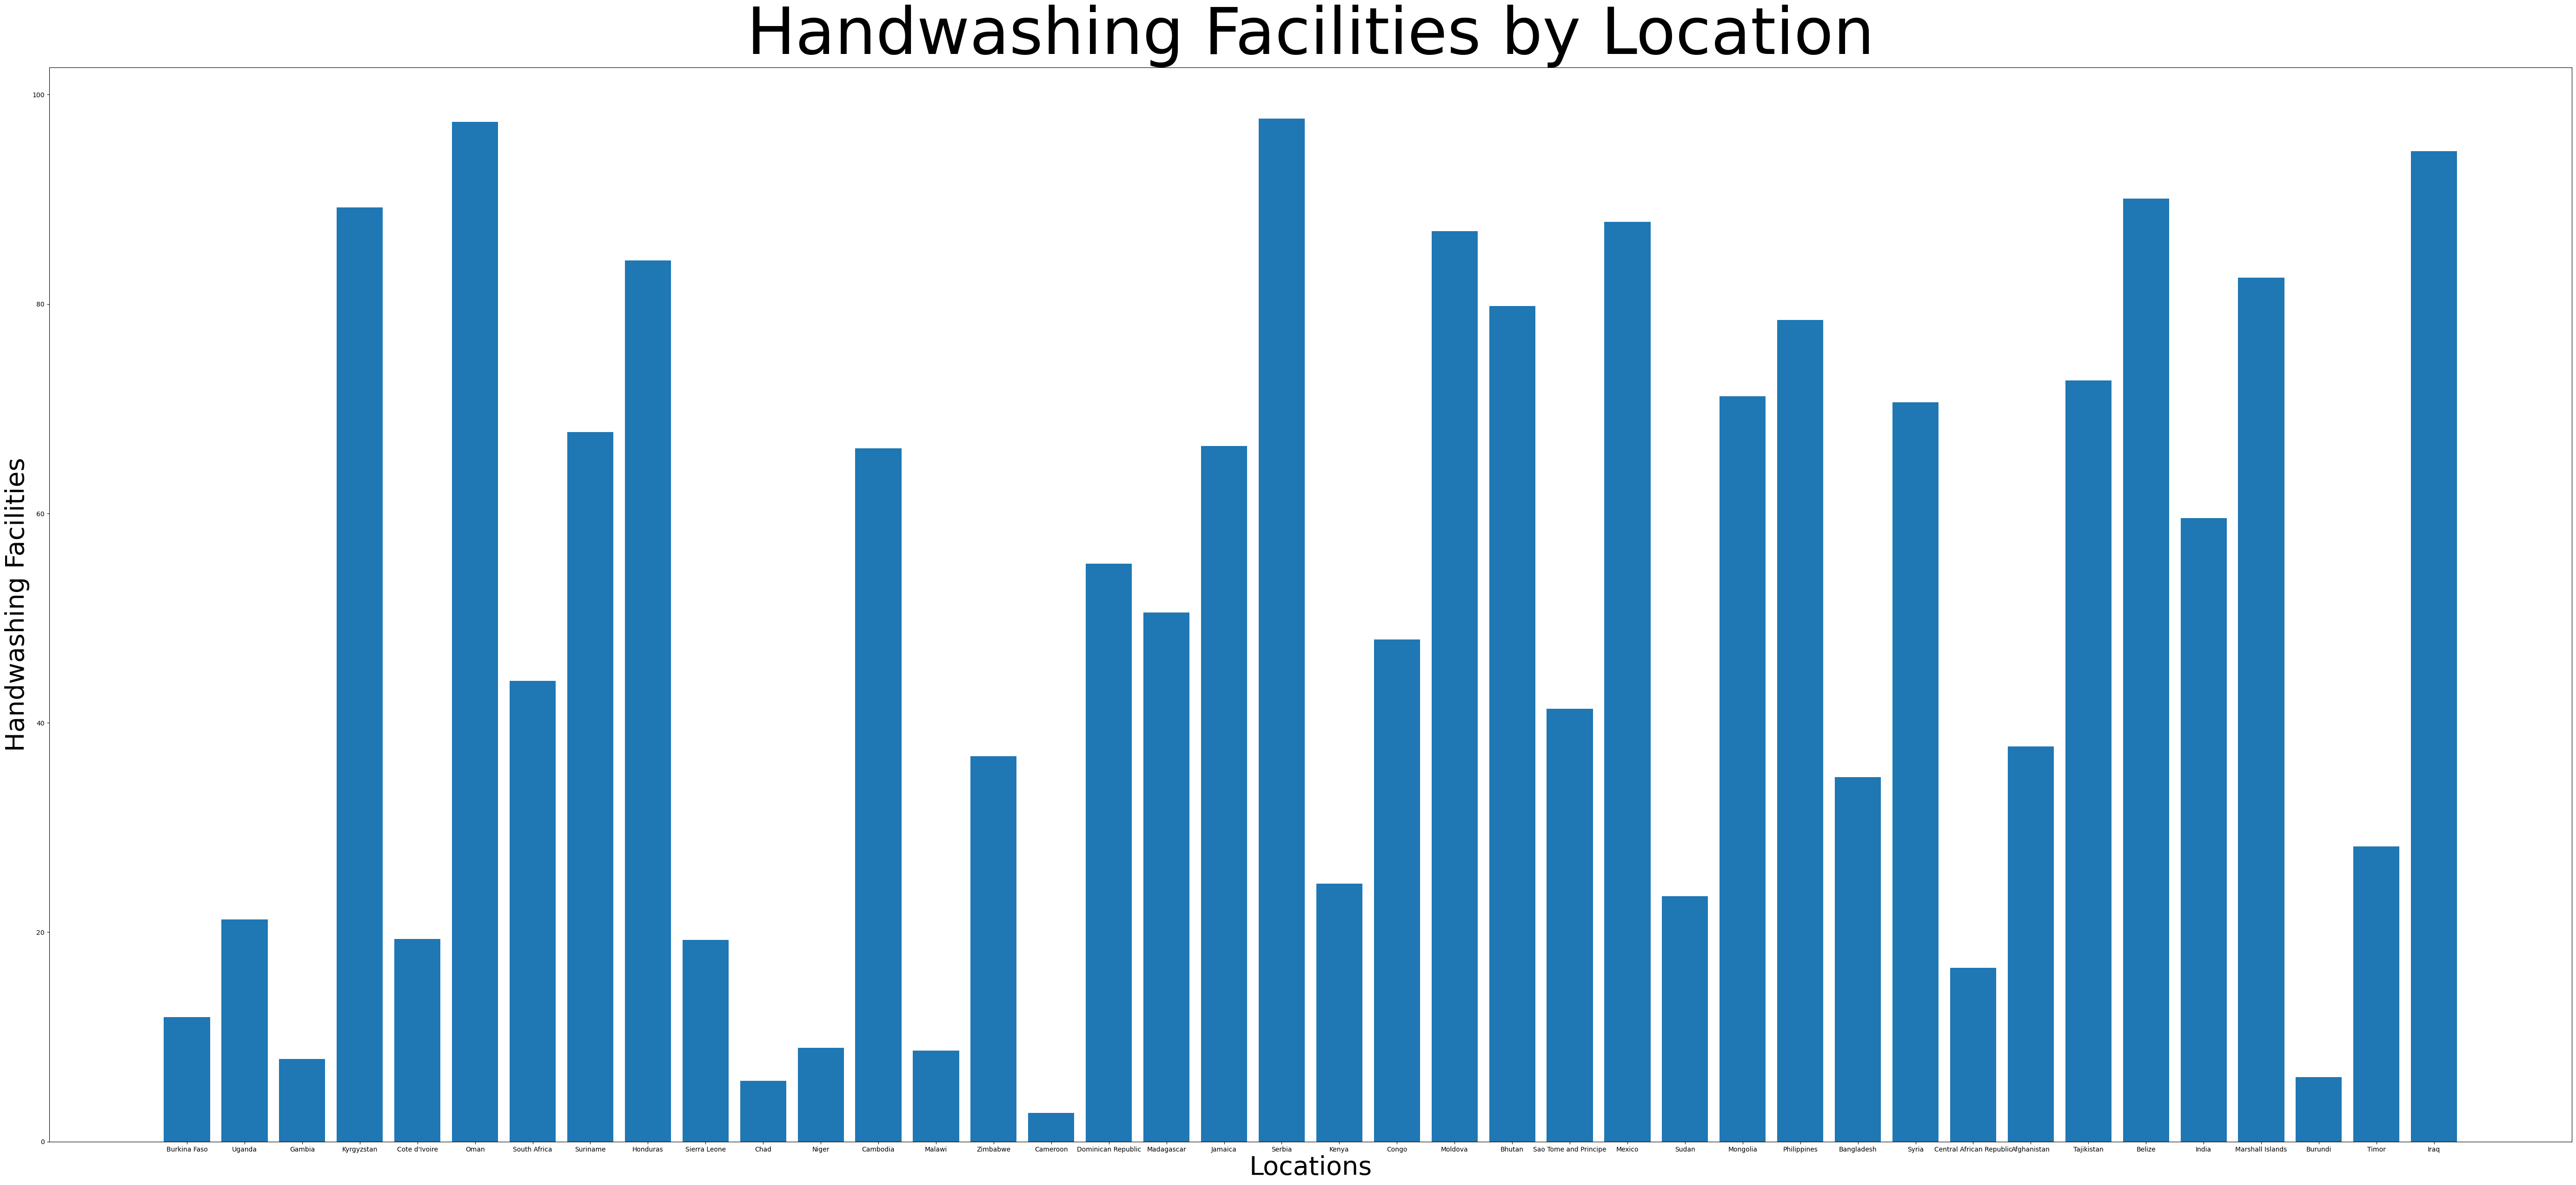

In [78]:
samp_HF_nonzero =sample.drop(sample[sample['handwashing_facilities'] == 0].index)
plt.figure(figsize = (70,30))
plt.bar(samp_HF_nonzero['location'], samp_HF_nonzero['handwashing_facilities'])
plt.xlabel('Locations', fontsize=40)
plt.ylabel('Handwashing Facilities', fontsize=40)
plt.title('Handwashing Facilities by Location', fontsize=100)

# Show the plot
plt.show()

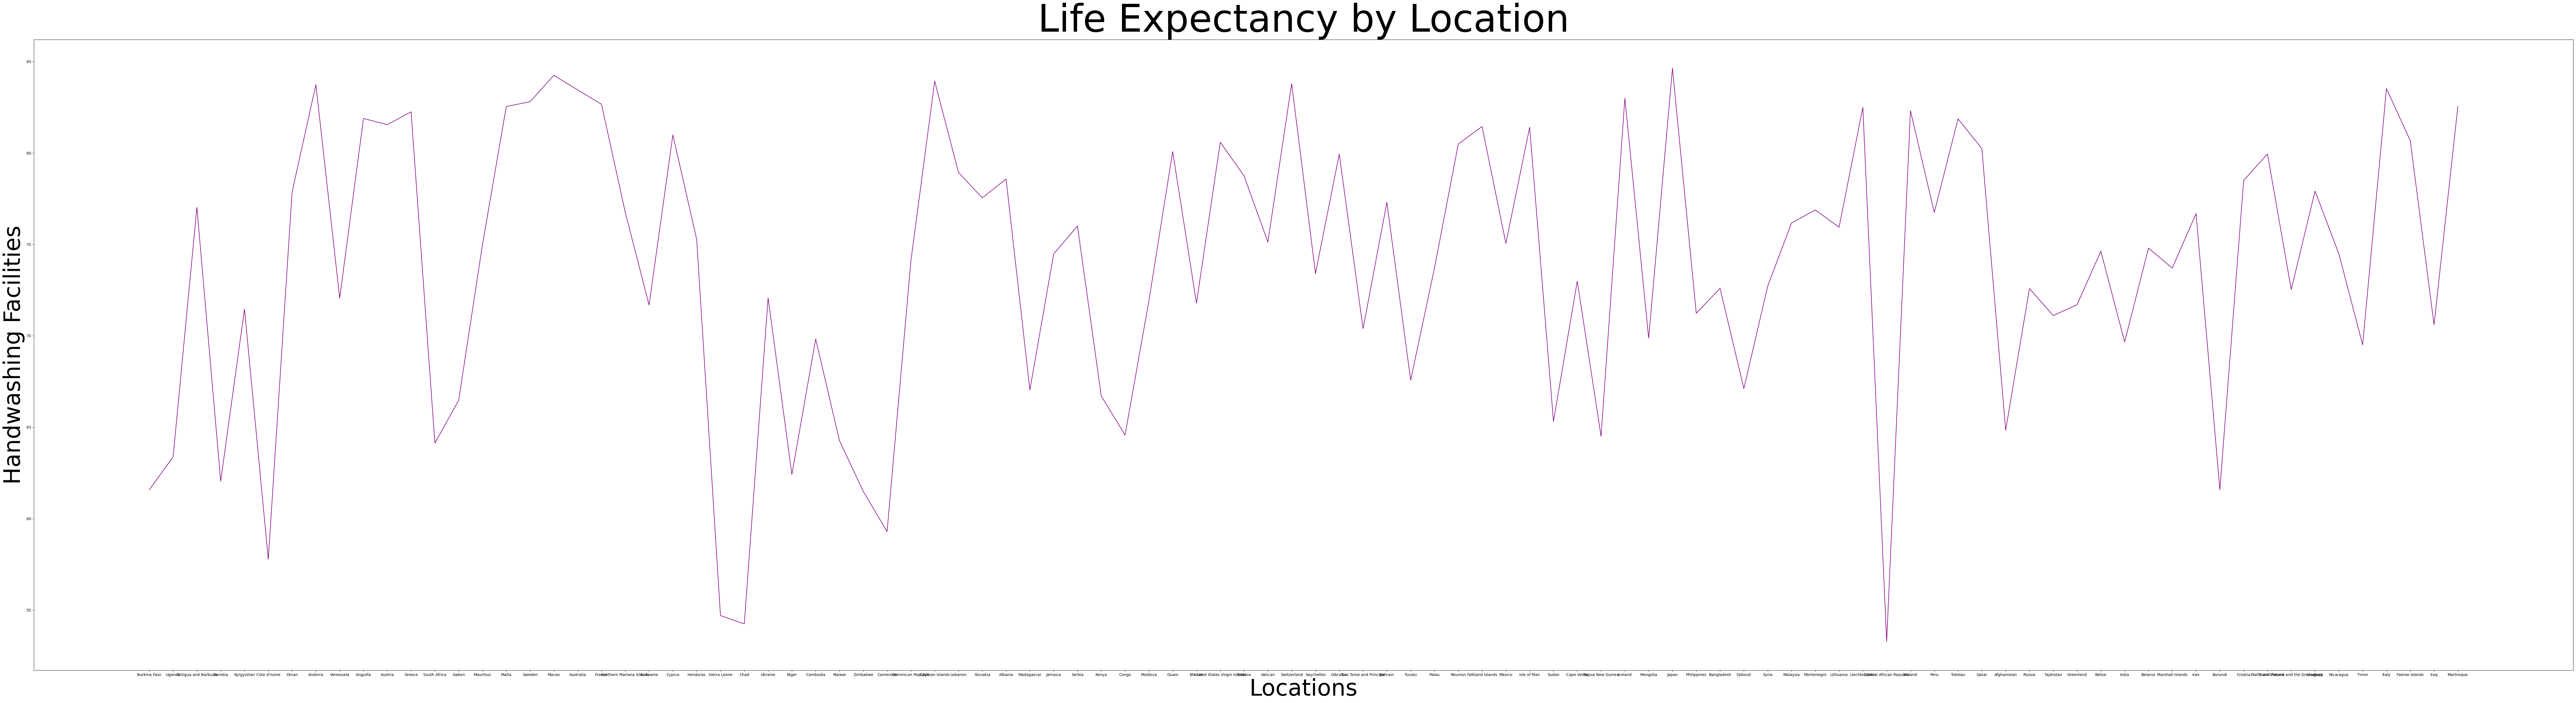

In [88]:
samp_HF_nonzero =sample.drop(sample[sample['life_expectancy'] == 0].index)
plt.figure(figsize = (120,30))
plt.plot(samp_HF_nonzero['location'], samp_HF_nonzero['life_expectancy'], color='purple')
plt.xlabel('Locations', fontsize=60)
plt.ylabel('Handwashing Facilities', fontsize=60)
plt.title('Life Expectancy by Location', fontsize=100)

# Show the plot
plt.show()

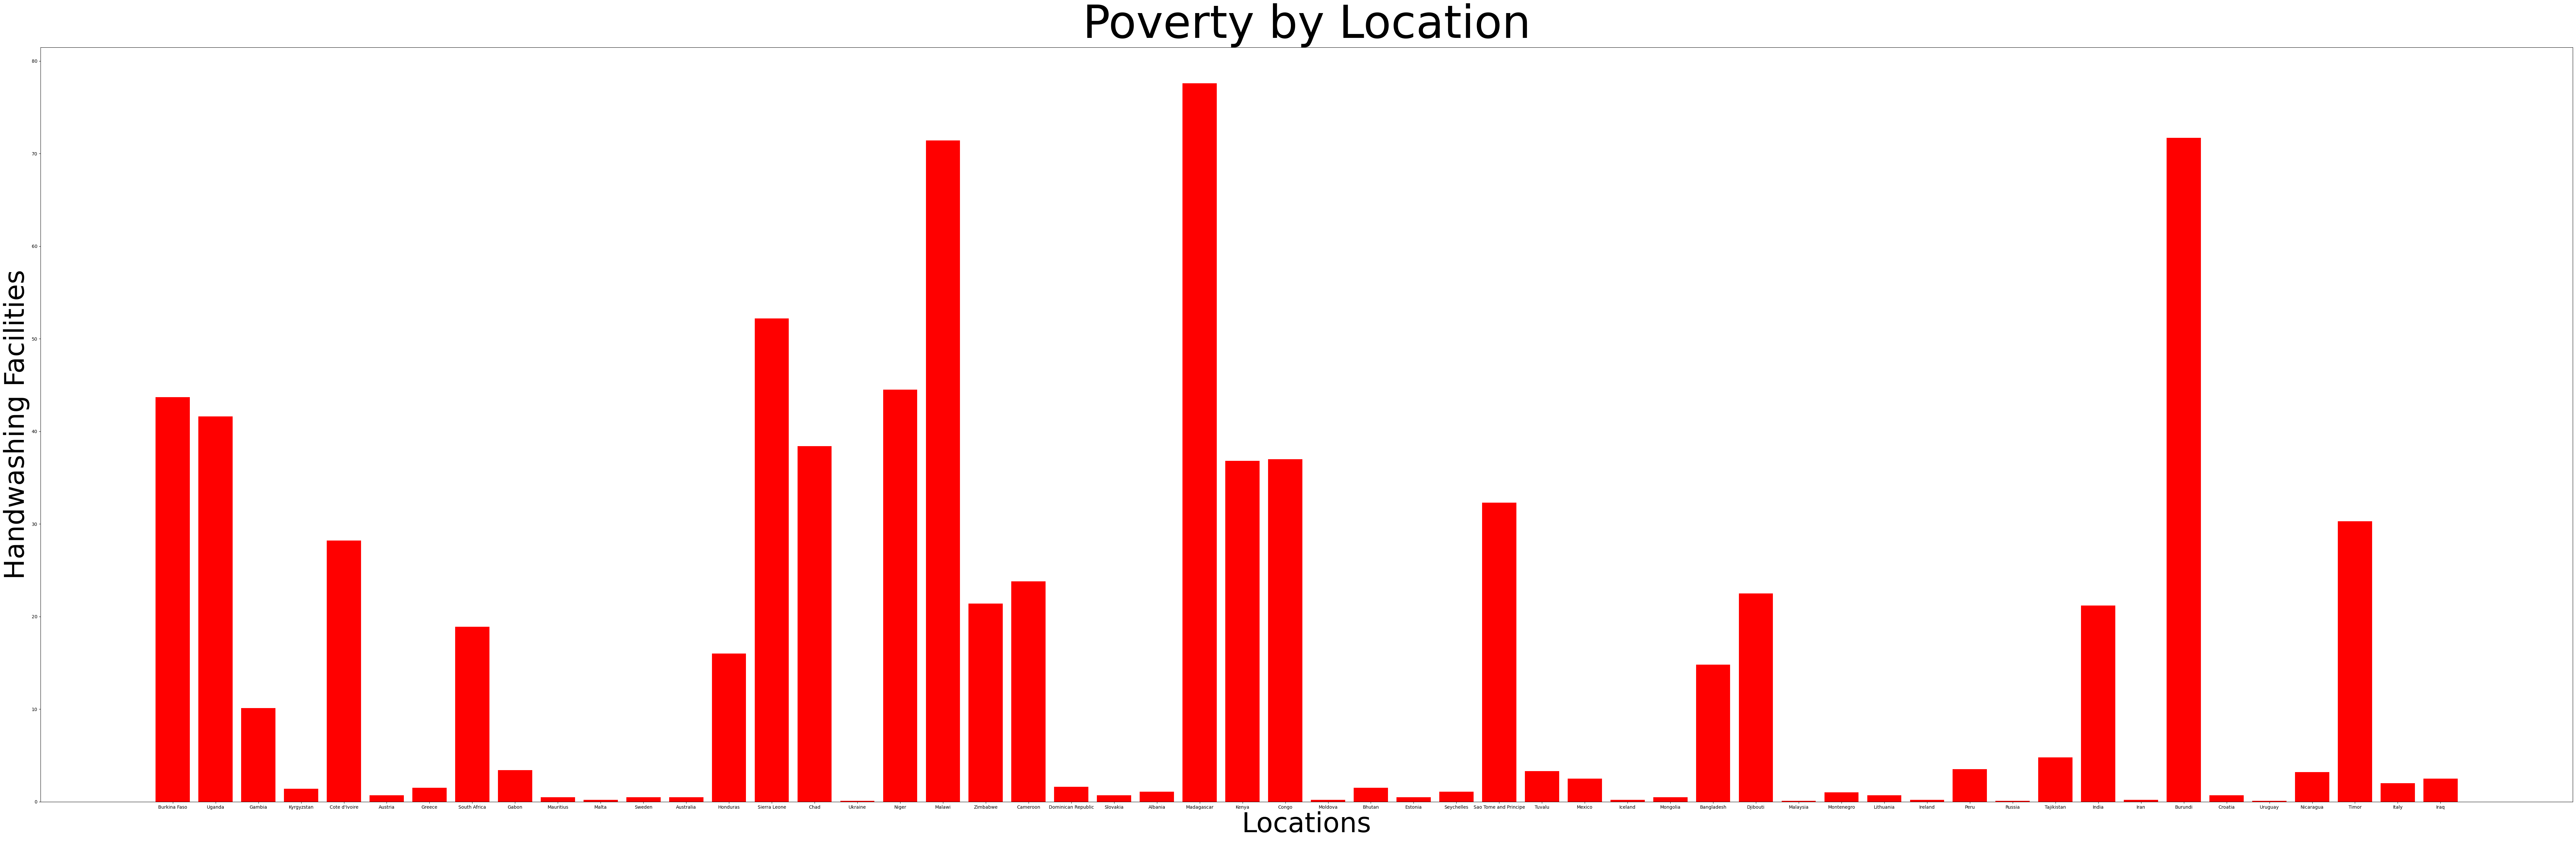

In [89]:
samp_HF_nonzero =sample.drop(sample[sample['extreme_poverty'] == 0].index)
plt.figure(figsize = (100,30))
plt.bar(samp_HF_nonzero['location'], samp_HF_nonzero['extreme_poverty'], color='red')
plt.xlabel('Locations',fontsize=60)
plt.ylabel('Handwashing Facilities', fontsize=60)
plt.title('Poverty by Location', fontsize=100)

# Show the plot
plt.show()

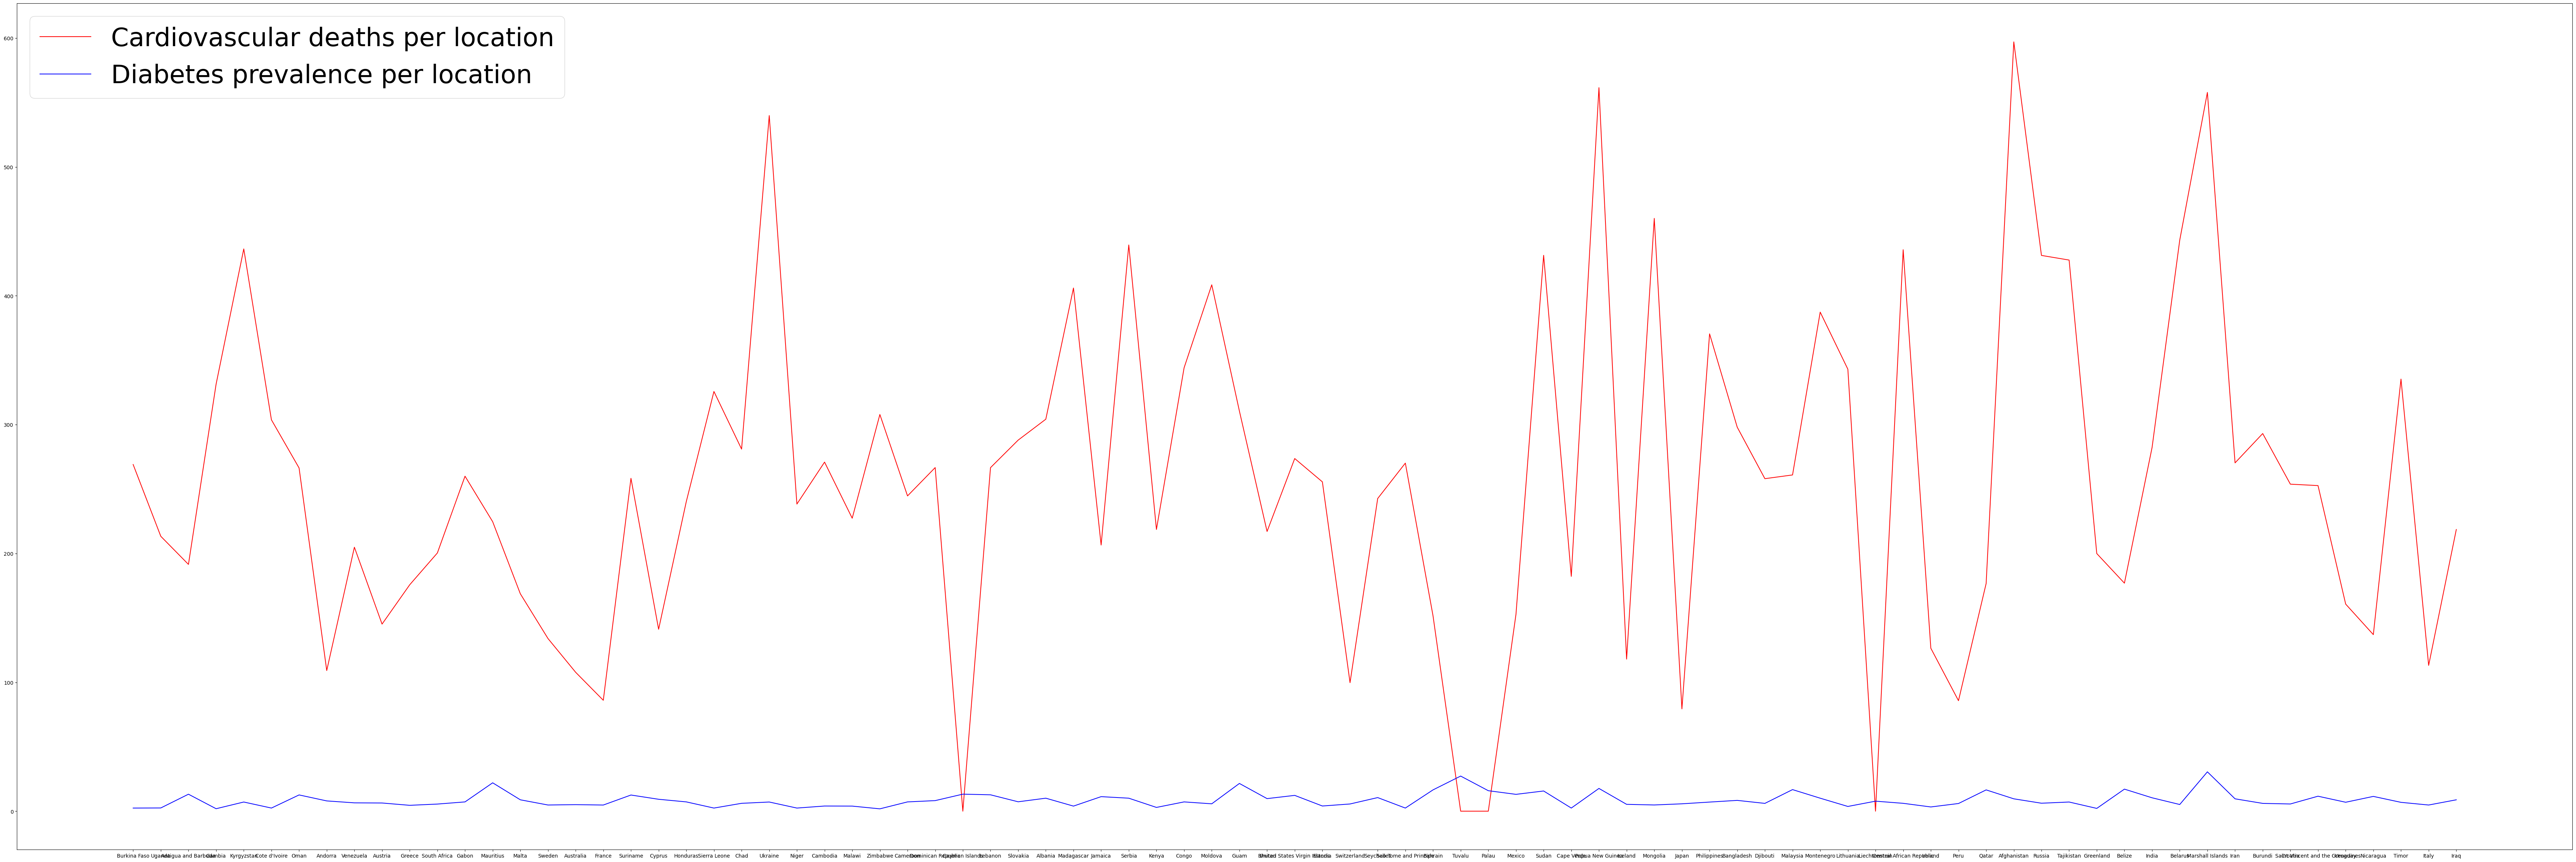

In [96]:
samp_HF_nonzero =sample.drop(sample[sample['cardiovasc_death_rate'] == 0].index)
samp_HF_nonzero =sample.drop(sample[sample['diabetes_prevalence'] == 0].index)
plt.figure(figsize=(90, 30))
plt.plot(samp_HF_nonzero['location'], samp_HF_nonzero['cardiovasc_death_rate'], "-r", label="Cardiovascular deaths per location")
plt.plot(samp_HF_nonzero['location'], samp_HF_nonzero['diabetes_prevalence'], "-b", label="Diabetes prevalence per location")
plt.legend(loc="upper left", fontsize="50")
plt.show()